In [29]:
import os
import pandas as pd
import numpy as np
from nltk import LancasterStemmer
from gensim.models import Doc2Vec

C:\Users\aruba\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [28]:
os.listdir()

['.ipynb_checkpoints',
 'context_embeddings_TransE_50.npy',
 'entity2id.txt',
 'entity_embeddings_TransE_50.npy',
 'Essay_Form.docx',
 'Ethical_20583888.docx',
 'Ethical_Essay_20583888.pdf',
 'Fast-TransX',
 'FYP txt',
 'generate_kg.ipynb',
 'kg.txt',
 'kg_preprocess.py',
 'knowledge_graph.txt',
 'openie_csv',
 'openie_wikientity_csv_filtered',
 'prepare_data_for_transx.py',
 'relation2id.txt',
 'TransE_entity2vec_50.vec',
 'TransE_relation2vec_50.vec',
 'TransH_A_50.vec',
 'TransH_entity2vec_50.vec',
 'TransH_relation2vec_50.vec',
 'TransR_A_50.vec',
 'TransR_entity2vec_50.vec',
 'TransR_relation2vec_50.vec',
 'triple2id.txt']

In [7]:
FILE_PATH = 'openie_wikientity_csv_filtered'
filtered_files = os.listdir(FILE_PATH)
# for file in filtered_files:
    

In [16]:
kg = pd.DataFrame()
for file in filtered_files:
    temp = pd.read_csv(os.path.join(FILE_PATH,file))
    kg = kg.append(temp)

In [23]:
triples = kg[['subject','relation','object']]
triples = triples.applymap(lambda s: s.lower() if type(s) == str else s)
triples = triples.drop_duplicates(subset=None, keep='first', inplace=False)

In [24]:
triples

,subject,relation,object
0,pradeep kumar,is,java tutorials interfaces
1,classes,are,marked with keyword
2,abstract classes,are,marked
3,abstract classes,are,marked with abstract keyword
4,classes,are,marked with abstract keyword
...,...,...,...
43,your issue,sign in,home pageadd new users
44,your issue,sign in,true home pageadd new users
45,your issue,recover,passwordsdelete
46,简体 中文 繁體 日本語 한국어 english enable dark mode,send,feedback


In [27]:
triples.to_csv('kg.csv', header=None, index=None, sep='\t')

In [15]:
kg = pd.DataFrame()
temp = pd.read_csv(os.path.join(FILE_PATH,filtered_files[0]))
kg.append(temp)

,subject,relation,object,subject_wikientity,relation_wikientity,object_wikientity
0,Pradeep Kumar,is,JAVA Tutorials Interfaces,"['Pradeep_Kumar', 'Pradeep_Kumar']",[],"['O', 'O', 'O']"
1,classes,are,marked with keyword,['O'],['O'],"['O', 'O', 'O']"
2,abstract classes,are,marked,"['O', 'O']",['O'],['O']
3,abstract classes,are,marked with abstract keyword,"['O', 'O']",['O'],"['O', 'O', 'O', 'O']"
4,classes,are,marked with abstract keyword,['O'],['O'],"['O', 'O', 'O', 'O']"
...,...,...,...,...,...,...
117,interface Monkey,extends,BananaLover,"['O', 'O']",['O'],['O']
118,public static,modifiers for,variables in interface,"['O', 'O']","['O', 'O']","['O', 'O', 'O']"
119,variables,is in,interface,['O'],['O'],['O']
120,type,is,called,['O'],['O'],['O']


In [30]:
FILE_PATH = 'FYP txt'
text_files = os.listdir(FILE_PATH)

In [46]:
titles = []
original_texts = []
for file in text_files:
    titles.append(file)
    f = open(os.path.join(FILE_PATH, file), "r", encoding='utf8')
    txt = f.read()
    txt = txt.replace('\n', ' ')
    original_texts.append(txt)
    f.close()

In [43]:
from stop_words import get_stop_words
from nltk import LancasterStemmer
from nltk.tokenize import word_tokenize

stop_words = get_stop_words('en')
ls = LancasterStemmer()

In [68]:
!pip install smart_open

In [44]:
for i in range(len(texts)):
    string = word_tokenize(texts[i])
    string = [w for w in string if not w.lower() in stop_words]
    string = [ls.stem(w) for w in string]
    texts[i] = string

In [83]:
import smart_open
import gensim
def read_corpus(fname, tokens_only=False):
    flist = os.listdir(fname)
    for i in range(len(flist)):
        with smart_open.open(os.path.join(fname,flist[i]), encoding='utf8') as f:
#             for i,line in enumerate(f):
            line = f.read()
            tokens = gensim.utils.simple_preprocess(line)
            tokens = [w for w in tokens if not w.lower() in stop_words]
            if tokens_only:
                yield tokens
            else:
                yield gensim.models.doc2vec.TaggedDocument(tokens,[titles[i]])

corpus = list(read_corpus(FILE_PATH))

In [85]:
model = Doc2Vec(dm=0, dbow_words=1, min_count=4, negative=3,
                hs=0, sample=1e-4, window=5, vector_size=200, workers=8)
model.build_vocab(corpus)
model.train(corpus, total_examples=model.corpus_count, epochs=5)

In [90]:
from collections import defaultdict
doc_vector_dict = defaultdict(list)
for one in corpus:
    doc_vector_dict[one.tags[0]] = model.docvecs[one.tags[0]]

<ipython-input-90-d3478de12ab2>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  doc_vector_dict[one.tags[0]] = model.docvecs[one.tags[0]]


In [95]:
for doc_id, doc_vector in doc_vector_dict.items():
    sim_docs = model.docvecs.most_similar([doc_vector], topn=5)
    print(doc_id)
    print(sim_docs)

<ipython-input-95-8efe94f30a2f>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sim_docs = model.docvecs.most_similar([doc_vector], topn=5)


'''soft computing'''0.txt
[("'''soft computing'''0.txt", 1.0), ('divide and conquer algorithm2.txt', 0.8181072473526001), ("digital signal processing ('''dsp''')0.txt", 0.8047241568565369), ('formal methods6.txt', 0.7931389808654785), ('computer program12.txt', 0.7682585120201111)]
'''soft computing'''1.txt
[("'''soft computing'''1.txt", 1.0), ('expression6.txt', 0.7119153738021851), ("'''soft computing'''6.txt", 0.6799867153167725), ("'''soft computing'''7.txt", 0.6727589964866638), ('expression5.txt', 0.6606477499008179)]
'''soft computing'''10.txt
[("'''soft computing'''10.txt", 1.0), ('agent architecture3.txt', 0.9873466491699219), ('agent-based model (abm)8.txt', 0.9838154911994934), ('human-computer interaction (hci)4.txt', 0.9828078746795654), ('formal methods8.txt', 0.9811570048332214)]
'''soft computing'''11.txt
[("'''soft computing'''11.txt", 0.9999999403953552), ('software agent11.txt', 0.9293378591537476), ("'''soft computing'''9.txt", 0.8772493004798889), ("'''soft computi

computer scientist5.txt
[('computer scientist5.txt', 1.0), ('computer science4.txt', 0.7184834480285645), ('software development0.txt', 0.6928646564483643), ('computer programming3.txt', 0.6584404110908508), ('object code8.txt', 0.6493132710456848)]
computer scientist6.txt
[('computer scientist6.txt', 0.9999999403953552), ('insertion sort6.txt', 0.960028886795044), ('object-oriented programming (oop)6.txt', 0.9261075258255005), ('hash table0.txt', 0.9202311038970947), ('merge sort6.txt', 0.9162167310714722)]
computer scientist7.txt
[('computer scientist7.txt', 1.0), ('declaration13.txt', 0.8857997059822083), ('container8.txt', 0.8812665343284607), ('library (computing)12.txt', 0.8783566355705261), ('external library2.txt', 0.8712371587753296)]
computer scientist8.txt
[('computer scientist8.txt', 1.0), ('reliability engineering7.txt', 0.6360077857971191), ('computer science14.txt', 0.6350665092468262), ('human-computer interaction (hci)10.txt', 0.6284378170967102), ('computer programmin

data type14.txt
[('data type14.txt', 1.0), ('csv9.txt', 0.8636214733123779), ('concatenation5.txt', 0.8056246042251587), ('data type12.txt', 0.8028712868690491), ('data type13.txt', 0.797073245048523)]
data type15.txt
[('data type15.txt', 1.0), ('hash function12.txt', 0.7660236358642578), ('precondition12.txt', 0.7439714074134827), ('concurrency7.txt', 0.7400223016738892), ('iteration8.txt', 0.7374377250671387)]
data type16.txt
[('data type16.txt', 1.0), ('data type13.txt', 0.8488146066665649), ('concatenation5.txt', 0.8325463533401489), ('data type12.txt', 0.8281294703483582), ('double-precision floating-point format9.txt', 0.823591947555542)]
data type2.txt
[('data type2.txt', 1.0), ('expression4.txt', 0.8061989545822144), ('data type16.txt', 0.784340500831604), ('method16.txt', 0.7840777039527893), ('primitive data type9.txt', 0.7811205387115479)]
data type3.txt
[('data type3.txt', 1.0), ('primitive data type2.txt', 0.8890345096588135), ('control flow5.txt', 0.85682612657547), ('rec

event7.txt
[('event7.txt', 1.0), ('cryptography9.txt', 0.8257841467857361), ('csv10.txt', 0.8160324692726135), ('programming language6.txt', 0.8055139780044556), ('filename extension8.txt', 0.8030599355697632)]
event8.txt
[('event8.txt', 1.0), ('method2.txt', 0.8474429845809937), ('record3.txt', 0.7960362434387207), ('object15.txt', 0.776492178440094), ('procedure0.txt', 0.7688357830047607)]
event9.txt
[('event9.txt', 1.0), ('iteration11.txt', 0.8184155225753784), ('application software6.txt', 0.7933512926101685), ('record4.txt', 0.7898473739624023), ('set10.txt', 0.7879370450973511)]
evolutionary computing0.txt
[('evolutionary computing0.txt', 1.0), ('distributed computing12.txt', 0.8865379691123962), ('computer graphics0.txt', 0.8583511114120483), ('reliability engineering3.txt', 0.8331502676010132), ('computer program7.txt', 0.8273032307624817)]
evolutionary computing1.txt
[('evolutionary computing1.txt', 1.0), ('heapsort9.txt', 0.9880741834640503), ('distributed computing13.txt', 0

global variable5.txt
[('global variable5.txt', 1.0), ('global variable8.txt', 0.8587051033973694), ('serialization7.txt', 0.8383064270019531), ('reference counting2.txt', 0.821862518787384), ('invariant10.txt', 0.8204436302185059)]
global variable6.txt
[('global variable6.txt', 0.9999999403953552), ('for loop5.txt', 0.8599526286125183), ('abstract method8.txt', 0.837986409664154), ('internet bot9.txt', 0.8001458644866943), ('concatenation9.txt', 0.7311137914657593)]
global variable7.txt
[('global variable7.txt', 0.9999999403953552), ('global variable4.txt', 0.8718225955963135), ('continuation-passing style (cps)6.txt', 0.8664836883544922), ('global variable8.txt', 0.8575299978256226), ('control flow3.txt', 0.8441153168678284)]
global variable8.txt
[('global variable8.txt', 1.0), ('global variable1.txt', 0.9261113405227661), ('invariant10.txt', 0.9197383522987366), ('global variable4.txt', 0.8950331807136536), ('concatenation10.txt', 0.8771690726280212)]
global variable9.txt
[('global v

integer6.txt
[('integer6.txt', 1.0000001192092896), ('pointer2.txt', 0.9624161124229431), ('semantics7.txt', 0.7011895775794983), ('matrix10.txt', 0.6507043838500977), ('event15.txt', 0.6495687961578369)]
integer7.txt
[('integer7.txt', 1.0), ('executable0.txt', 0.8985568284988403), ('integer14.txt', 0.8950286507606506), ('daemon1.txt', 0.8823112845420837), ('conditional6.txt', 0.8790655732154846)]
integer8.txt
[('integer8.txt', 1.0), ('data type7.txt', 0.7353019714355469), ('data type16.txt', 0.7347655296325684), ('data type12.txt', 0.6920760869979858), ('data type9.txt', 0.6895185708999634)]
integer9.txt
[('integer9.txt', 1.0), ('integer10.txt', 0.8251240849494934), ('filename extension11.txt', 0.8213338851928711), ('double-precision floating-point format6.txt', 0.8092846274375916), ('quicksort9.txt', 0.8048048615455627)]
integrated development environment (ide)0.txt
[('integrated development environment (ide)0.txt', 1.0000001192092896), ('software deployment12.txt', 0.764473080635070

[('machine learning (ml)11.txt', 1.0000001192092896), ('data structure6.txt', 0.7494817972183228), ('software prototyping2.txt', 0.74331134557724), ('external library15.txt', 0.7000893950462341), ('download14.txt', 0.6825813055038452)]
machine learning (ml)12.txt
[('machine learning (ml)12.txt', 0.9999999403953552), ('machine learning (ml)5.txt', 0.7196778655052185), ('computer vision13.txt', 0.7180169820785522), ('evolutionary computing6.txt', 0.6920852065086365), ('computer vision11.txt', 0.6650111079216003)]
machine learning (ml)2.txt
[('machine learning (ml)2.txt', 1.0), ('evolutionary computing6.txt', 0.7583755254745483), ('machine learning (ml)6.txt', 0.7576451897621155), ('computer scientist1.txt', 0.7216319441795349), ('machine learning (ml)5.txt', 0.7203825116157532)]
machine learning (ml)3.txt
[('machine learning (ml)3.txt', 1.0), ('natural language processing (nlp)6.txt', 0.816418468952179), ('garbage in, garbage out (gigo)9.txt', 0.7609720826148987), ('quantum computing0.tx

[('pair programming9.txt', 1.0), ('precondition3.txt', 0.9361204504966736), ('conditional14.txt', 0.9322203397750854), ('numerical method7.txt', 0.9272432327270508), ('formal methods3.txt', 0.9210985898971558)]
peripheral0.txt
[('peripheral0.txt', 1.0), ('declaration11.txt', 0.8138270974159241), ('reference6.txt', 0.796812117099762), ('library (computing)9.txt', 0.7700005769729614), ('object code8.txt', 0.7646574378013611)]
peripheral1.txt
[('peripheral1.txt', 1.0), ('information space analysis4.txt', 0.8617212176322937), ('peripheral2.txt', 0.7990854978561401), ('linker8.txt', 0.7989903688430786), ('expression6.txt', 0.7782618999481201)]
peripheral10.txt
[('peripheral10.txt', 1.0), ('memory4.txt', 0.7839457988739014), ('peripheral8.txt', 0.7808719277381897), ('procedure8.txt', 0.7147685289382935), ('peripheral12.txt', 0.7038055062294006)]
peripheral11.txt
[('peripheral11.txt', 1.0), ('inheritance7.txt', 0.8177191019058228), ('hard problem11.txt', 0.7943598628044128), ('filter (softwar

r programming language8.txt
[('r programming language8.txt', 1.0), ('concatenation13.txt', 0.7830456495285034), ('aggregate function5.txt', 0.7736451625823975), ('concatenation10.txt', 0.743349015712738), ('aggregate function7.txt', 0.7390193343162537)]
r programming language9.txt
[('r programming language9.txt', 1.0), ('concatenation13.txt', 0.6793470978736877), ('concatenation4.txt', 0.6585472226142883), ('r programming language8.txt', 0.6486272811889648), ('integrated development environment (ide)4.txt', 0.6444665193557739)]
radix0.txt
[('radix0.txt', 1.0), ('debugging12.txt', 0.7656694650650024), ('programming language10.txt', 0.7509798407554626), ('software development4.txt', 0.7441591024398804), ('information visualization5.txt', 0.7216717600822449)]
radix1.txt
[('radix1.txt', 1.0), ('list0.txt', 0.8542733788490295), ('data center7.txt', 0.8086528182029724), ('digital data14.txt', 0.7951051592826843), ('reliability engineering4.txt', 0.7909183502197266)]
radix10.txt
[('radix10.tx

serialization7.txt
[('serialization7.txt', 1.0), ('global variable5.txt', 0.8383064270019531), ('serialization14.txt', 0.8363202810287476), ('functional programming10.txt', 0.8238242864608765), ('executable6.txt', 0.8201889991760254)]
serialization8.txt
[('serialization8.txt', 0.9999999403953552), ('filename extension4.txt', 0.8251700401306152), ('serialization3.txt', 0.7878345251083374), ('serialization7.txt', 0.7871894240379333), ('documentation5.txt', 0.7862750291824341)]
serialization9.txt
[('serialization9.txt', 1.0), ('object code1.txt', 0.9516493678092957), ('internet0.txt', 0.9435167908668518), ('cyberspace3.txt', 0.942997395992279), ('prolog13.txt', 0.9400007128715515)]
service level agreement0.txt
[('service level agreement0.txt', 1.0), ('service level agreement2.txt', 0.832443356513977), ('service level agreement11.txt', 0.8122655749320984), ('container1.txt', 0.7982642650604248), ('internet15.txt', 0.7798066139221191)]
service level agreement1.txt
[('service level agreement

In [98]:
length = len(original_texts)
length

2579

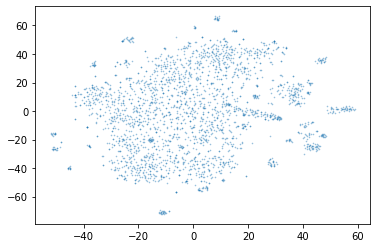

In [104]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

doc_tags = list(doc_vector_dict.keys())
X = model[doc_tags]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
plt.scatter(df['x'], df['y'], s=0.4, alpha=0.4)
